### Get Data

In [2]:
import pandas as pd


ger_prod = pd.read_csv("data/ger_production.csv")
ger_ci = pd.read_csv("data/ger_ci.csv")
ger_prod = ger_prod.rename(columns={"Unnamed: 0": "Time"})

### Visualize relationship of rewnewables and carbon intensity

In [5]:
ger_merged = pd.merge(ger_prod, ger_ci, on="Time")
print(len(ger_merged))
ger_merged.head()

37147


,Time,Biomass,Fossil Brown coal/Lignite,Fossil Gas,Fossil Hard coal,Fossil Oil,Geothermal,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,...,CZ,DK,FR,LU,NL,NO,PL,SE,CH,Carbon Intensity
0,2019-12-20 00:00:00,4851.0,6761.0,3573.0,2369.0,446.0,26.0,-3108.0,1176.0,135.0,...,200.0,0.0,3957.0,0.0,402.0,NaN,0.0,0.0,0.0,218.290031
1,2019-12-20 00:15:00,4854.0,6707.0,3558.0,2328.0,446.0,26.0,-3302.0,1178.0,88.0,...,184.0,0.0,3955.0,0.0,648.5,NaN,0.0,0.0,0.0,217.883434
2,2019-12-20 00:30:00,4880.0,6754.0,3510.0,2304.0,446.0,26.0,-3828.0,1183.0,114.0,...,184.0,0.0,3955.0,0.0,648.5,NaN,0.0,0.0,0.0,217.494426
3,2019-12-20 00:45:00,4869.0,6703.0,3533.0,2284.0,446.0,27.0,-4111.0,1188.0,68.0,...,184.0,0.0,3955.0,0.0,648.5,NaN,0.0,0.0,0.0,217.603025
4,2019-12-20 01:00:00,4874.0,6639.0,3565.0,2254.0,446.0,26.0,-3903.0,1201.0,73.0,...,168.0,0.0,3953.0,0.0,895.0,NaN,0.0,0.0,0.0,216.761357


In [10]:
# Mean and std norm for each column
ger_merged_mean_std = ger_merged.copy()
for col in ger_merged_mean_std.columns:
    if col != "Time":
        mean = ger_merged_mean_std[col].mean()
        std = ger_merged_mean_std[col].std()
        ger_merged_mean_std[col] = (ger_merged_mean_std[col] - mean) / std
ger_merged_mean_std.head()

,Time,Biomass,Fossil Brown coal/Lignite,Fossil Gas,Fossil Hard coal,Fossil Oil,Geothermal,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,...,CZ,DK,FR,LU,NL,NO,PL,SE,CH,Carbon Intensity
0,2019-12-20 00:00:00,-0.457230,-0.672117,-0.893278,0.167735,-1.312166,-0.614112,-0.994551,-2.238673,1.588666,...,-0.991354,-0.513287,0.857025,NaN,2.194639,NaN,-0.305579,-0.355341,-0.593459,-0.908946
1,2019-12-20 00:15:00,-0.396279,-0.701240,-0.906539,0.111834,-1.312166,-0.614112,-1.063702,-2.221948,0.494479,...,-1.021835,-0.513287,0.855250,NaN,3.786094,NaN,-0.305579,-0.355341,-0.593459,-0.916185
2,2019-12-20 00:30:00,0.131958,-0.675892,-0.948972,0.079111,-1.312166,-0.614112,-1.251195,-2.180136,1.099774,...,-1.021835,-0.513287,0.855250,NaN,3.786094,NaN,-0.305579,-0.355341,-0.593459,-0.923110
3,2019-12-20 00:45:00,-0.091527,-0.703397,-0.928639,0.051841,-1.312166,-0.084705,-1.352071,-2.138325,0.028868,...,-1.021835,-0.513287,0.855250,NaN,3.786094,NaN,-0.305579,-0.355341,-0.593459,-0.921177
4,2019-12-20 01:00:00,0.010057,-0.737912,-0.900351,0.010938,-1.312166,-0.614112,-1.277929,-2.029614,0.145271,...,-1.052316,-0.513287,0.853475,NaN,5.377548,NaN,-0.305579,-0.355341,-0.593459,-0.936160


In [19]:
ger_merged.columns

Index(['Time', 'Biomass', 'Fossil Brown coal/Lignite', 'Fossil Gas',
       'Fossil Hard coal', 'Fossil Oil', 'Geothermal', 'Hydro Pumped Storage',
       'Hydro Run-of-river and poundage', 'Hydro Water Reservoir', 'Nuclear',
       'Other', 'Other renewable', 'Solar', 'Waste', 'Wind Offshore',
       'Wind Onshore', 'AT', 'BE', 'CZ', 'DK', 'FR', 'LU', 'NL', 'NO', 'PL',
       'SE', 'CH', 'Carbon Intensity'],
      dtype='object')

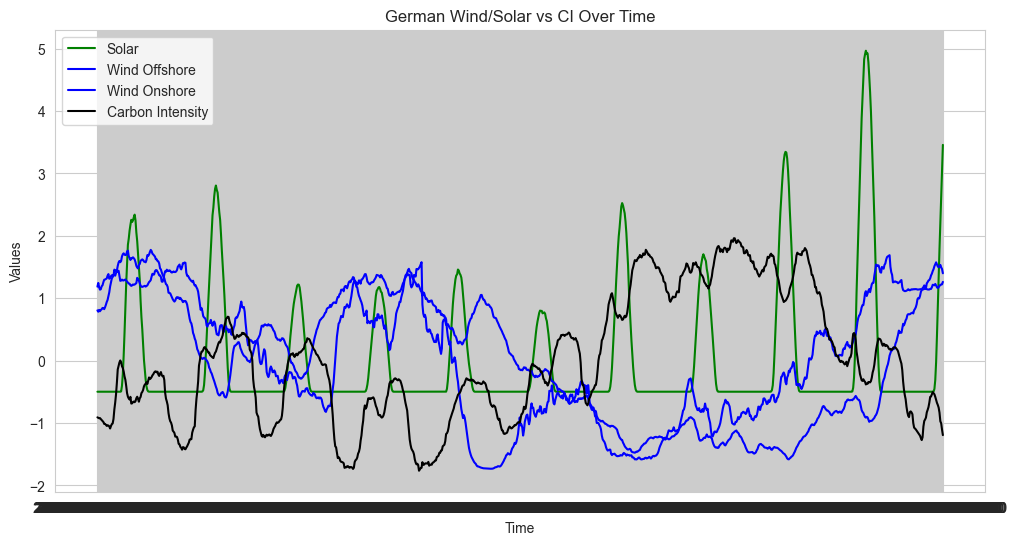

In [12]:
from matplotlib import pyplot as plt

to_plot = 1000
ger_merged_mean_std = ger_merged_mean_std.head(to_plot)

plt.figure(figsize=(12, 6))
plt.plot(ger_merged_mean_std["Time"], ger_merged_mean_std["Solar"], label="Solar", color="green")
plt.plot(ger_merged_mean_std["Time"], ger_merged_mean_std["Wind Offshore"], label="Wind Offshore", color="blue")
plt.plot(ger_merged_mean_std["Time"], ger_merged_mean_std["Wind Onshore"], label="Wind Onshore", color="blue")
plt.plot(ger_merged_mean_std["Time"], ger_merged_mean_std["Carbon Intensity"], label="Carbon Intensity", color="black")
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("German Wind/Solar vs CI Over Time")
plt.legend()
plt.show()

### Correlation Analysis of Renewables and Carbon Intensity

#### Pearson Correlation

In [18]:
import pandas as pd

target = "Carbon Intensity"

# Ensure numeric
ger_merged[target] = pd.to_numeric(ger_merged[target], errors="coerce")

num = ger_merged.select_dtypes(include="number")
features = [c for c in num.columns if c != target]

rows = []
for col in features:
    tmp = ger_merged[[col, target]].dropna()
    if len(tmp) < 2:
        corr = float("nan")
        std = float("nan")
    else:
        corr = tmp[col].corr(tmp[target])  # Pearson
        std = tmp[col].std()

    rows.append({
        "Energy Source": col,
        "Corr with CI": corr,
        "Std": std
    })

corr_df = pd.DataFrame(rows)

# Absolute correlation
corr_df["|Corr with CI|"] = corr_df["Corr with CI"].abs()

# Ranks (1 = strongest / largest)
corr_df["Corr Rank"] = corr_df["|Corr with CI|"].rank(
    ascending=False, method="min"
).astype("Int64")

corr_df["Std Rank"] = corr_df["Std"].rank(
    ascending=False, method="min"
).astype("Int64")

# Sort by absolute correlation strength
corr_df = corr_df.sort_values("|Corr with CI|", ascending=False).reset_index(drop=True)

corr_df

/opt/miniconda3/envs/deepstock/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/miniconda3/envs/deepstock/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Energy Source,Corr with CI,Std,|Corr with CI|,Corr Rank,Std Rank
0,Wind Onshore,-0.825634,6544.448952,0.825634,1,1
1,Fossil Gas,0.803571,1131.187122,0.803571,2,6
2,Fossil Hard coal,0.716113,733.429561,0.716113,3,8
3,Other,0.708428,48.706460,0.708428,4,19
4,Other renewable,0.690594,17.930318,0.690594,5,21
5,Fossil Brown coal/Lignite,0.640561,1854.243652,0.640561,6,5
6,AT,0.637285,357.872476,0.637285,7,13
7,Nuclear,0.579946,380.173070,0.579946,8,12
8,CZ,0.565157,524.919925,0.565157,9,9
9,Hydro Run-of-river and poundage,0.550459,119.583339,0.550459,10,17


In [42]:
new_df = pd.read_csv("new_data/AGGREGATED_GENERATION_PER_TYPE_GENERATION_202301010000-202401010000.csv")
print(len(new_df))
new_df.head()

735840


/var/folders/52/g_lyzpqs4hg171_0l9xn1__00000gn/T/ipykernel_5481/1698647608.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv("new_data/AGGREGATED_GENERATION_PER_TYPE_GENERATION_202301010000-202401010000.csv")


,MTU (UTC),Area,Production Type,Generation (MW)
0,01/01/2023 00:00:00 - 01/01/2023 00:15:00,BZN|DE-LU,Biomass,4020.74
1,01/01/2023 00:15:00 - 01/01/2023 00:30:00,BZN|DE-LU,Biomass,4030.47
2,01/01/2023 00:30:00 - 01/01/2023 00:45:00,BZN|DE-LU,Biomass,4023.84
3,01/01/2023 00:45:00 - 01/01/2023 01:00:00,BZN|DE-LU,Biomass,4020.65
4,01/01/2023 01:00:00 - 01/01/2023 01:15:00,BZN|DE-LU,Biomass,3992.78


In [43]:
import pandas as pd

# 1. CONFIGURATION
df = new_df

# 2. CLEAN TIME COLUMN
# ---------------------------------------------------------
# The raw column looks like: "01.01.2025 00:00 - 01.01.2025 00:15"
# We split it to get just the start time: "01.01.2025 00:00"
df['Time'] = pd.to_datetime(
    df['MTU (UTC)'].str.split(' - ').str[0],
    dayfirst=True
)

# 3. CLEAN GENERATION VALUES
# ---------------------------------------------------------
# ENTSO-E sometimes uses 'n/e' or '-' for zero/missing.
# We force the 'Generation (MW)' column to be numbers. Errors become 0.
df['Generation (MW)'] = pd.to_numeric(df['Generation (MW)'], errors='coerce').fillna(0)

# 4. PIVOT (THE TRANSFORMATION)
# ---------------------------------------------------------
# This commands moves 'Production Type' entries into Column Headers
print("Pivoting data to give each type its own column...")
df_wide = df.pivot_table(
    index='Time',
    columns='Production Type',
    values='Generation (MW)',
    aggfunc='sum'  # Sum ensures if duplicates exist, they combine nicely
)

# 5. RESAMPLE TO HOURLY (Optional but Recommended)
# ---------------------------------------------------------
# Your raw data is 15-minute intervals.
# Aggregating to 1-hour makes the file 4x smaller and easier to chart.
df_hourly = df_wide.resample('30min').mean()

# 6. SAVE
# ---------------------------------------------------------
output_file = 'germany_2023_generation.csv'
df_hourly.to_csv(output_file)

print("-" * 40)
print(f"SUCCESS: Data saved to '{output_file}'")
print("-" * 40)
print(f"Rows:    {len(df_hourly)}")
print(f"Columns: {len(df_hourly.columns)}")
print("\nNew Columns Created:")
for col in df_hourly.columns:
    print(f" - {col}")

Pivoting data to give each type its own column...
----------------------------------------
SUCCESS: Data saved to 'germany_2023_generation.csv'
----------------------------------------
Rows:    17520
Columns: 21

New Columns Created:
 - Biomass
 - Energy storage
 - Fossil Brown coal/Lignite
 - Fossil Coal-derived gas
 - Fossil Gas
 - Fossil Hard coal
 - Fossil Oil
 - Fossil Oil shale
 - Fossil Peat
 - Geothermal
 - Hydro Pumped Storage
 - Hydro Run-of-river and pondage
 - Hydro Water Reservoir
 - Marine
 - Nuclear
 - Other
 - Other renewable
 - Solar
 - Waste
 - Wind Offshore
 - Wind Onshore
